--------------------------
PROYECTO MACHINE LEARNING: Instacart Market Basket Analysis
---------------------------

1. Segmentación de clientes (Clustering)
2. Sistema de recomendación de productos



In [7]:


# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilos
sns.set(style='whitegrid')
%matplotlib inline


Mis datasets
-----

In [3]:

# Cargar los datos
orders = pd.read_csv('../data/orders.csv')
order_products_prior = pd.read_csv('../data/order_products__prior.csv')
products = pd.read_csv('../data/products.csv')
aisles = pd.read_csv('../data/aisles.csv')
departments = pd.read_csv('../data/departments.csv')





In [14]:
departments.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['department_id', 'department'], dtype='object')>

Revisión de valores nulos (NaN)

In [4]:
# Verificar valores nulos en los datasets principales
print("Valores nulos en 'orders':")
print(orders.isnull().sum())
print("\nValores nulos en 'order_products_prior':")
print(order_products_prior.isnull().sum())
print("\nValores nulos en 'products':")
print(products.isnull().sum())
print("\nValores nulos en 'aisles':")
print(aisles.isnull().sum())
print("\nValores nulos en 'departments':")
print(departments.isnull().sum())


Valores nulos en 'orders':
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Valores nulos en 'order_products_prior':
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Valores nulos en 'products':
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Valores nulos en 'aisles':
aisle_id    0
aisle       0
dtype: int64

Valores nulos en 'departments':
department_id    0
department       0
dtype: int64


Revisión y explicación de cada uno de los datasets

In [5]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


| Columna                  | Descripción                                                                                                                 |
| ------------------------ | --------------------------------------------------------------------------------------------------------------------------- |
| `order_id`               | Identificador único del pedido.                                                                                             |
| `user_id`                | Identificador único del usuario que hizo el pedido.                                                                         |
| `eval_set`               | Conjunto de datos (train, test, validation). Indica si el pedido está en el conjunto de entrenamiento, prueba o validación. |
| `order_number`           | Número del pedido. El primer pedido de un usuario será `1`, el segundo será `2`, etc.                                       |
| `order_dow`              | Día de la semana en que se hizo el pedido (0 = lunes, 1 = martes, ..., 6 = domingo).                                        |
| `order_hour_of_day`      | Hora del día en la que se hizo el pedido (0 a 23).                                                                          |
| `days_since_prior_order` | Días transcurridos desde el último pedido. Si es el primer pedido, será `NaN`.                                              |


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


| Columna             | Descripción                                                                  |
| ------------------- | ---------------------------------------------------------------------------- |
| `order_id`          | Identificador único del pedido. Relacionado con `orders.csv`.                |
| `product_id`        | Identificador único del producto comprado. Relacionado con `products.csv`.   |
| `add_to_cart_order` | Posición en que el producto fue añadido al carrito de compras en ese pedido. |
| `reordered`         | Si el producto fue **vuelto a ordenar** en ese pedido (1 = sí, 0 = no).      |


In [8]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


| Columna         | Descripción                                                                                         |
| --------------- | --------------------------------------------------------------------------------------------------- |
| `product_id`    | Identificador único del producto.                                                                   |
| `product_name`  | Nombre del producto.                                                                                |
| `aisle_id`      | Identificador de la **estantería** donde se encuentra el producto. Relacionado con `aisles.csv`.    |
| `department_id` | Identificador del **departamento** al que pertenece el producto. Relacionado con `departments.csv`. |


In [18]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


| Columna    | Descripción                                                                                           |
| ---------- | ----------------------------------------------------------------------------------------------------- |
| `aisle_id` | Identificador único de la **estantería**.                                                             |
| `aisle`    | Nombre de la **estantería** o categoría del producto (por ejemplo, "bebidas", "frutas", "panadería"). |


In [19]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


| Columna         | Descripción                                                                      |
| --------------- | -------------------------------------------------------------------------------- |
| `department_id` | Identificador único del **departamento**.                                        |
| `department`    | Nombre del **departamento** (por ejemplo, "alimentos", "bebidas", "cosméticos"). |


In [15]:
orders.shape

(3421083, 7)

Merge de datasets

In [5]:

# Unir datos para análisis
order_products = order_products_prior.merge(products, on='product_id', how='left')
order_products = order_products.merge(aisles, on='aisle_id', how='left')
order_products = order_products.merge(departments, on='department_id', how='left')

Usuarios únicos, número de productos únicos y número de pedidos

In [12]:
# Análisis exploratorio
# Número total de usuarios, productos y pedidos
num_users = orders['user_id'].nunique()
num_products = products['product_id'].nunique()
num_orders = orders['order_id'].nunique()

print(f'Número de usuarios: {num_users}')
print(f'Número de productos: {num_products}')
print(f'Número de pedidos: {num_orders}')


Número de usuarios: 206209
Número de productos: 49688
Número de pedidos: 3421083


Compras por usuario/a

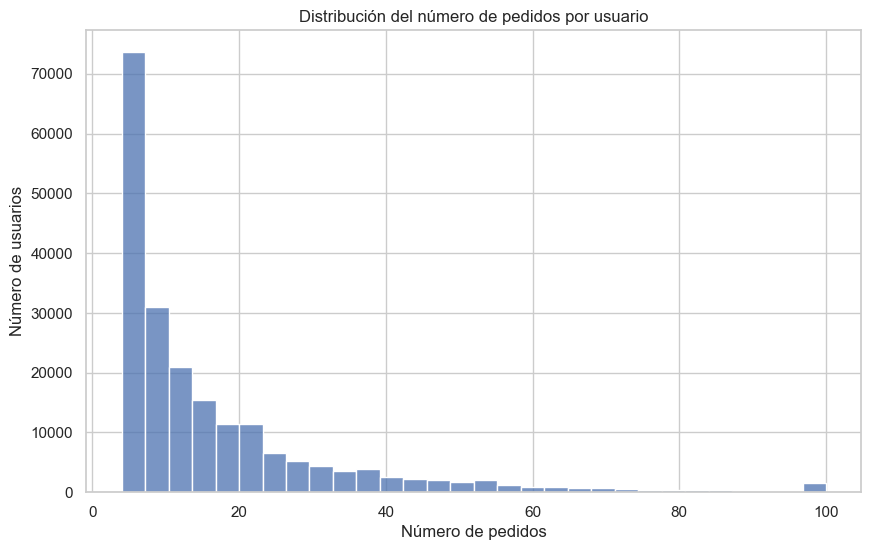

In [13]:
# Frecuencia de compra por usuario
user_order_counts = orders.groupby('user_id')['order_number'].max()
plt.figure(figsize=(10,6))
sns.histplot(user_order_counts, bins=30, kde=False)
plt.title('Distribución del número de pedidos por usuario')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de usuarios')
plt.show()


In [22]:
user_order_counts

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_number, Length: 206209, dtype: int64

Frecuencia de compras en función del día de la semana (order_dow):

C:\Users\nerea\AppData\Local\Temp\ipykernel_1564\3517552447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_dow', data=orders, palette='Set2')


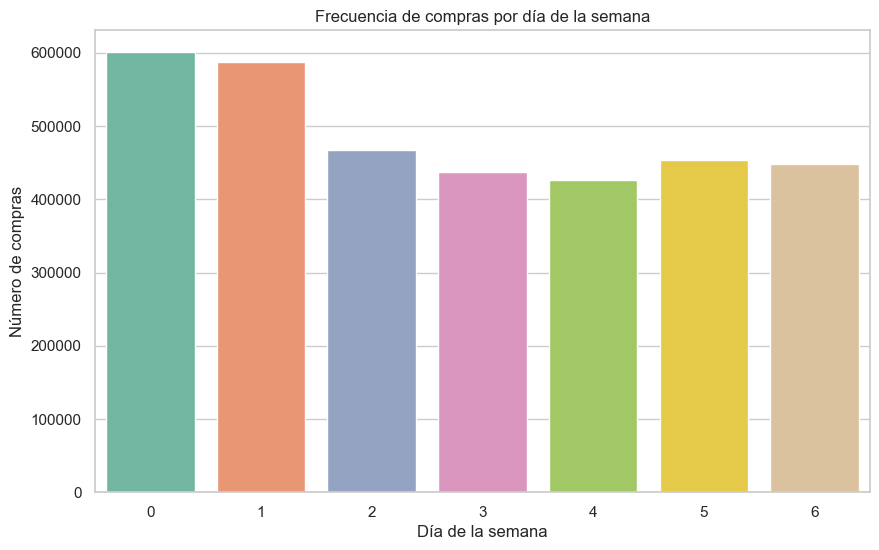

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='order_dow', data=orders, palette='Set2')
plt.title('Frecuencia de compras por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de compras')
plt.show()


Frecuencia de compras según la hora del día (order_hour_of_day):

C:\Users\nerea\AppData\Local\Temp\ipykernel_1564\2588490532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour_of_day', data=orders, palette='Set2')


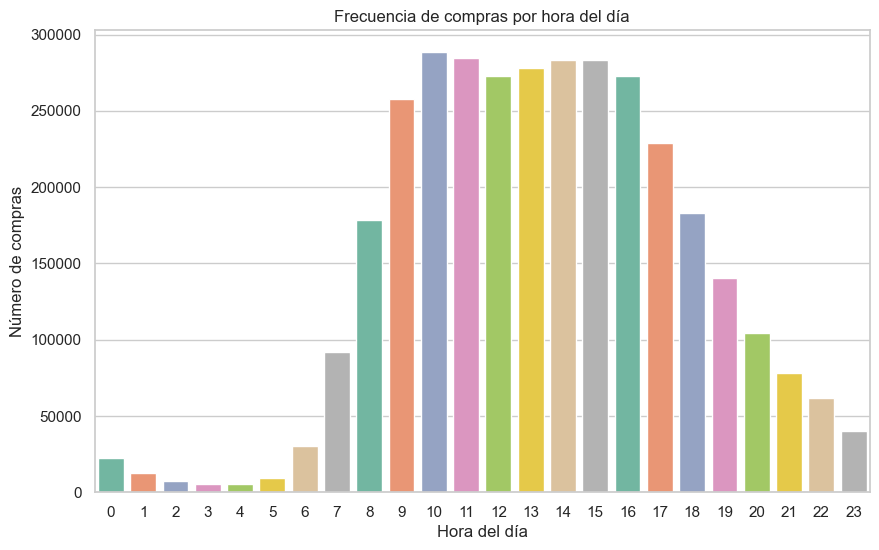

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='order_hour_of_day', data=orders, palette='Set2')
plt.title('Frecuencia de compras por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de compras')
plt.show()


Días desde la última compra (days_since_prior_order):

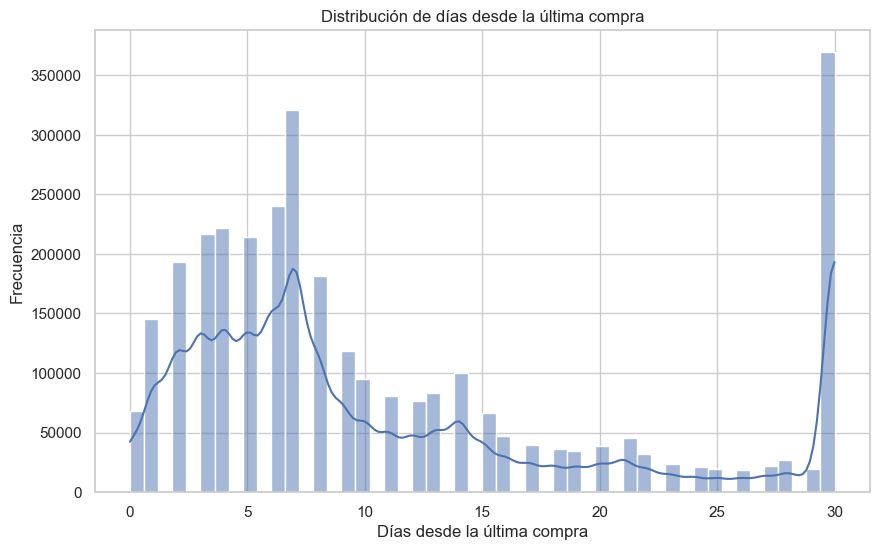

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=50, kde=True)
plt.title('Distribución de días desde la última compra')
plt.xlabel('Días desde la última compra')
plt.ylabel('Frecuencia')
plt.show()


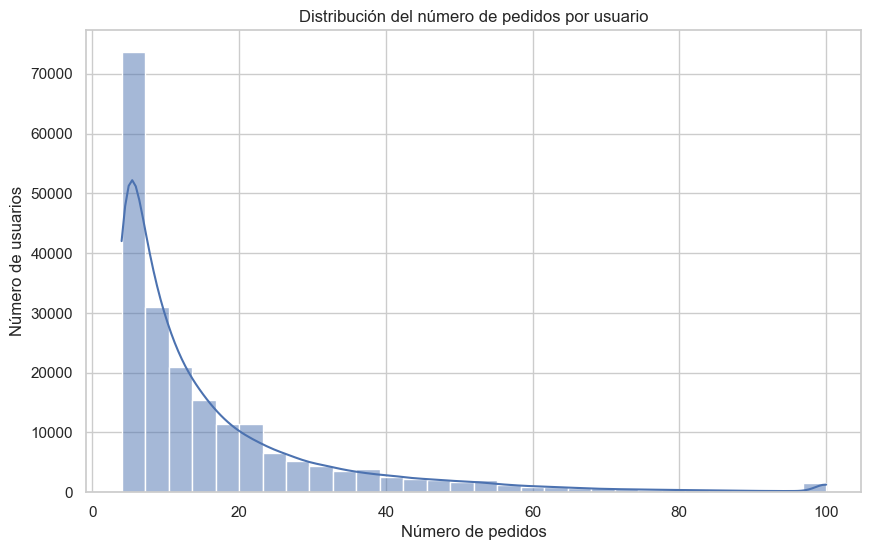

In [24]:
# Análisis de la frecuencia de compras por usuario
user_order_counts = orders.groupby('user_id')['order_number'].max()
plt.figure(figsize=(10,6))
sns.histplot(user_order_counts, bins=30, kde=True)
plt.title('Distribución del número de pedidos por usuario')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de usuarios')
plt.show()

Productos más vendidos

C:\Users\nerea\AppData\Local\Temp\ipykernel_1564\3360586586.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


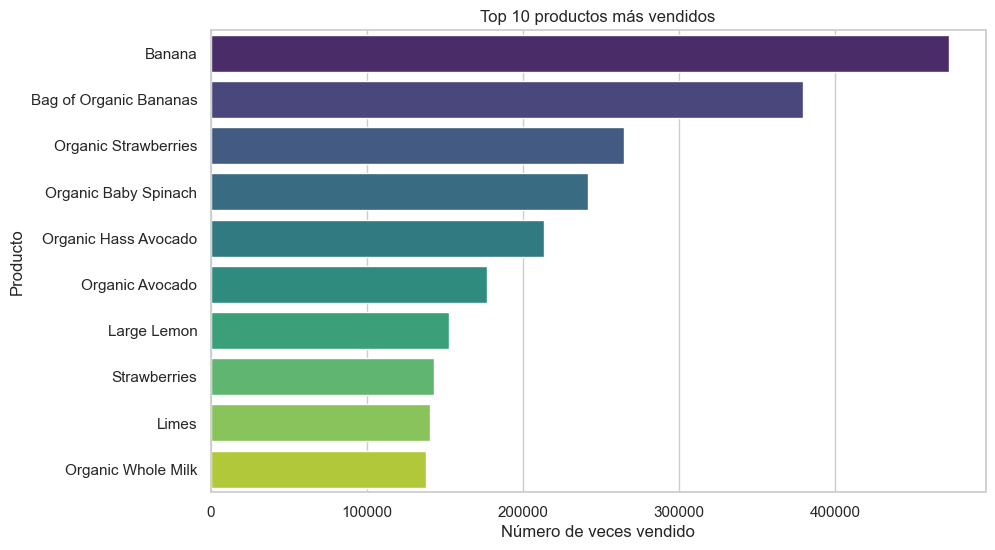

In [14]:

# Productos más vendidos
top_products = order_products['product_name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 productos más vendidos')
plt.xlabel('Número de veces vendido')
plt.ylabel('Producto')
plt.show()

Productos reordenados:
¿Qué porcentaje de productos se reordenan?

In [31]:
reorder_percentage = order_products['reordered'].mean()
print(f"Porcentaje de productos reordenados: {reorder_percentage * 100:.2f}%")


Porcentaje de productos reordenados: 58.97%


Número de productos por pedido:

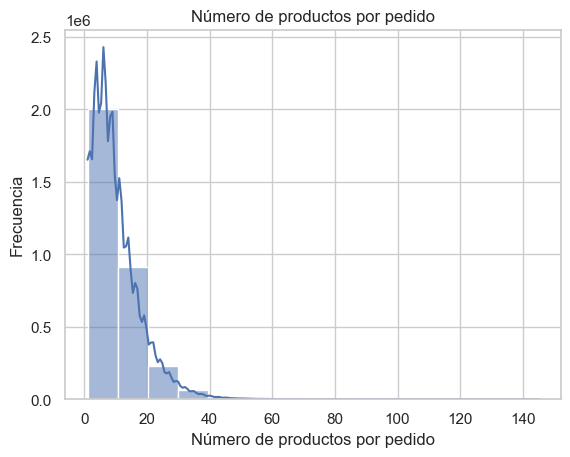

In [37]:
products_per_order = order_products.groupby('order_id')['product_id'].count()
sns.histplot(products_per_order, bins=15, kde=True)
plt.title('Número de productos por pedido')
plt.xlabel('Número de productos por pedido')
plt.ylabel('Frecuencia')
plt.show()
